In [ ]:
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 30.5 MB 101.3 MB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.14.0-py3-none-any.whl size=30560039 sha256=8f2de8668954773340ee6739ae9a916cedaaf780ccbf2b3911b0503313be99fb
  Stored in directory: /root/.cache/pip/wheels/97/36/50/1fc99e4a3ce636ed30739cc2cb333b36e6e3778f365f1adf77
Successfully built kiwipiepy-model


In [ ]:
!wget -c https://github.com/e9t/nsmc/raw/master/ratings_train.txt # colab
# import wget

# wget.download('https://github.com/e9t/nsmc/raw/master/ratings_train.txt')

--2022-10-31 04:42:08--  https://github.com/e9t/nsmc/raw/master/ratings_train.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt [following]
--2022-10-31 04:42:09--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.1s    

2022-10-31 04:42:09 (129 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]



### 데이터 확인

In [ ]:
import pandas as pd

# nsmc = pd.read_csv(r'./ratings_train.txt', header=None, sep = ',', error_bad_lines = False)
# nsmc = pd.read_table('./ratings_train.txt')
nsmc = pd.read_csv('./ratings_train.txt', sep = '\t')
nsmc

id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]

### 형태소 분석

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.prepare()

In [ ]:
text = nsmc.document[0]
text

'아 더빙.. 진짜 짜증나네요 목소리'

In [ ]:
result = kiwi.analyze(text)
result

[([Token(form='아', tag='IC', start=0, len=1),
   Token(form='더빙', tag='NNG', start=2, len=2),
   Token(form='..', tag='SF', start=4, len=2),
   Token(form='진짜', tag='MAG', start=7, len=2),
   Token(form='짜증', tag='NNG', start=10, len=2),
   Token(form='나', tag='VV', start=12, len=1),
   Token(form='네요', tag='EF', start=13, len=2),
   Token(form='목소리', tag='NNG', start=16, len=3)],
  -70.44538879394531)]

In [ ]:
result1 = kiwi.analyze(nsmc.document)
result1

In [ ]:
a = 0

try:
    for idx, x in enumerate(result1):
        print(x)
        a = idx
    print(a)
except:
    pass

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[([Token(form='기대', tag='NNG', start=0, len=2), Token(form='에', tag='JKB', start=2, len=1), Token(form='못', tag='MAG', start=4, len=1), Token(form='미치', tag='VV', start=5, len=2), Token(form='었', tag='EP', start=6, len=1), Token(form='어요', tag='EF', start=7, len=2), Token(form='저', tag='NP', start=10, len=1), Token(form='는', tag='JX', start=11, len=1), Token(form='거의', tag='MAG', start=13, len=2), Token(form='졸', tag='VV', start=16, len=1), Token(form='었', tag='EP', start=17, len=1), Token(form='고', tag='EC', start=18, len=1), Token(form='애', tag='NNG', start=20, len=1), Token(form='들', tag='XSN', start=21, len=1), Token(form='도', tag='JX', start=22, len=1), Token(form='집중', tag='NNG', start=24, len=2), Token(form='하', tag='XSV', start=26, len=1), Token(form='지', tag='EC', start=27, len=1), Token(form='못', tag='MAG', start=29, len=1), Token(form='하', tag='VV', start=30, len=1), Token(form='더라구요', tag='EF', start=31, len=4)], -100.4105453491211)]
[([T

In [ ]:
result[0][0]

[Token(form='아', tag='IC', start=0, len=1),
 Token(form='더빙', tag='NNG', start=2, len=2),
 Token(form='..', tag='SF', start=4, len=2),
 Token(form='진짜', tag='MAG', start=7, len=2),
 Token(form='짜증', tag='NNG', start=10, len=2),
 Token(form='나', tag='VV', start=12, len=1),
 Token(form='네요', tag='EF', start=13, len=2),
 Token(form='목소리', tag='NNG', start=16, len=3)]

In [ ]:
for token, pos, start, end in result[0][0]:
    if pos in ['NNG', 'VV', 'VA']:
        print(token)

더빙
짜증
나
목소리


In [ ]:
for token, pos, start, end in result[0][0]:
    if pos[0] in 'NV':
        print(f'{token} / {pos}')

더빙 / NNG
짜증 / NNG
나 / VV
목소리 / NNG


In [ ]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}/{pos}'

In [ ]:
list(extract_keywords(nsmc.document[1]))

['포스터/NNG',
 '보/VV',
 '초딩/NNP',
 '영화/NNG',
 '줄/NNG',
 '오버/NNG',
 '연기/NNG',
 '가볍/VA-I',
 '않/VX']

### 문서 단어 행렬

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_keywords)

In [ ]:
dtm = cv.fit_transform(nsmc.loc[0:1999, 'document'])

In [ ]:
trans = TfidfTransformer()
dtm2 = trans.fit_transform(dtm)

In [ ]:
dtm.shape

(2000, 1000)

In [ ]:
words = cv.get_feature_names()
words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['가/VV',
 '가/VX',
 '가능/NNG',
 '가볍/VA-I',
 '가슴/NNG',
 '가족/NNG',
 '가지/NNB',
 '가지/VV',
 '가치/NNG',
 '각본/NNG',
 '간/NNB',
 '갈등/NNG',
 '감독/NNG',
 '감동/NNG',
 '감사/NNG',
 '감성/NNG',
 '감정/NNG',
 '강요/NNG',
 '강하/VA',
 '같/VA',
 '개/NNB',
 '개/NNG',
 '개그/NNG',
 '개그맨/NNG',
 '개념/NNG',
 '개봉/NNG',
 '개뿔/NNG',
 '개연/NNG',
 '개인/NNG',
 '개판/NNG',
 '거/NNB',
 '거기/NP',
 '거리/NNG',
 '거리/VV',
 '거부/NNG',
 '거슬리/VV',
 '거장/NNG',
 '걱정/NNG',
 '걸/VV',
 '걸리/VV',
 '걸작/NNG',
 '검술/NNG',
 '것/NNB',
 '게이/NNG',
 '게임/NNG',
 '결국/NNG',
 '결말/NNG',
 '고추/NNG',
 '곳/NNG',
 '곳곳/NNG',
 '공감/NNG',
 '공감/NNP',
 '공부/NNG',
 '공포/NNG',
 '공포물/NNG',
 '곽지민/NNP',
 '관객/NNG',
 '관계/NNG',
 '관람/NNG',
 '관심/NNG',
 '괜찮/VA',
 '교훈/NNG',
 '구경/NNG',
 '구리/VA',
 '구성/NNG',
 '구하/VV',
 '국민/NNG',
 '국산/NNG',
 '군/NNG',
 '군대/NNG',
 '굿/NNG',
 '굿/NNP',
 '귀신/NNG',
 '귀엽/VA-I',
 '그/NP',
 '그거/NP',
 '그것/NP',
 '그녀/NP',
 '그때/NNG',
 '그래픽/NNG',
 '그러/VV',
 '그렇/VA',
 '그리/VV',
 '그림/NNG',
 '그립/VA-I',
 '극/NNG',
 '극장/NNG',
 '극장판/NNG',
 '글/NNG',
 '급/NNG',
 '기/NNG',
 '기대/NNG',
 '기독교/NNG',
 '기분/

### 저장

In [ ]:
import joblib

joblib.dump({'words': words, 'dtm':dtm}, 'nsmc.pkl')

['nsmc.pkl']

### train_test_split

In [ ]:
import joblib

data = joblib.load('nsmc.pkl')

In [ ]:
data['words']

['가/VV',
 '가/VX',
 '가능/NNG',
 '가볍/VA-I',
 '가슴/NNG',
 '가족/NNG',
 '가지/NNB',
 '가지/VV',
 '가치/NNG',
 '각본/NNG',
 '간/NNB',
 '갈등/NNG',
 '감독/NNG',
 '감동/NNG',
 '감사/NNG',
 '감성/NNG',
 '감정/NNG',
 '강요/NNG',
 '강하/VA',
 '같/VA',
 '개/NNB',
 '개/NNG',
 '개그/NNG',
 '개그맨/NNG',
 '개념/NNG',
 '개봉/NNG',
 '개뿔/NNG',
 '개연/NNG',
 '개인/NNG',
 '개판/NNG',
 '거/NNB',
 '거기/NP',
 '거리/NNG',
 '거리/VV',
 '거부/NNG',
 '거슬리/VV',
 '거장/NNG',
 '걱정/NNG',
 '걸/VV',
 '걸리/VV',
 '걸작/NNG',
 '검술/NNG',
 '것/NNB',
 '게이/NNG',
 '게임/NNG',
 '결국/NNG',
 '결말/NNG',
 '고추/NNG',
 '곳/NNG',
 '곳곳/NNG',
 '공감/NNG',
 '공감/NNP',
 '공부/NNG',
 '공포/NNG',
 '공포물/NNG',
 '곽지민/NNP',
 '관객/NNG',
 '관계/NNG',
 '관람/NNG',
 '관심/NNG',
 '괜찮/VA',
 '교훈/NNG',
 '구경/NNG',
 '구리/VA',
 '구성/NNG',
 '구하/VV',
 '국민/NNG',
 '국산/NNG',
 '군/NNG',
 '군대/NNG',
 '굿/NNG',
 '굿/NNP',
 '귀신/NNG',
 '귀엽/VA-I',
 '그/NP',
 '그거/NP',
 '그것/NP',
 '그녀/NP',
 '그때/NNG',
 '그래픽/NNG',
 '그러/VV',
 '그렇/VA',
 '그리/VV',
 '그림/NNG',
 '그립/VA-I',
 '극/NNG',
 '극장/NNG',
 '극장판/NNG',
 '글/NNG',
 '급/NNG',
 '기/NNG',
 '기대/NNG',
 '기독교/NNG',
 '기분/

In [ ]:
words = ''

In [ ]:
words

''

In [ ]:
locals().update(data) # locals()는 dict.key()값으로 변수를 만들어주는 함수!

In [ ]:
words

['가/VV',
 '가/VX',
 '가능/NNG',
 '가볍/VA-I',
 '가슴/NNG',
 '가족/NNG',
 '가지/NNB',
 '가지/VV',
 '가치/NNG',
 '각본/NNG',
 '간/NNB',
 '갈등/NNG',
 '감독/NNG',
 '감동/NNG',
 '감사/NNG',
 '감성/NNG',
 '감정/NNG',
 '강요/NNG',
 '강하/VA',
 '같/VA',
 '개/NNB',
 '개/NNG',
 '개그/NNG',
 '개그맨/NNG',
 '개념/NNG',
 '개봉/NNG',
 '개뿔/NNG',
 '개연/NNG',
 '개인/NNG',
 '개판/NNG',
 '거/NNB',
 '거기/NP',
 '거리/NNG',
 '거리/VV',
 '거부/NNG',
 '거슬리/VV',
 '거장/NNG',
 '걱정/NNG',
 '걸/VV',
 '걸리/VV',
 '걸작/NNG',
 '검술/NNG',
 '것/NNB',
 '게이/NNG',
 '게임/NNG',
 '결국/NNG',
 '결말/NNG',
 '고추/NNG',
 '곳/NNG',
 '곳곳/NNG',
 '공감/NNG',
 '공감/NNP',
 '공부/NNG',
 '공포/NNG',
 '공포물/NNG',
 '곽지민/NNP',
 '관객/NNG',
 '관계/NNG',
 '관람/NNG',
 '관심/NNG',
 '괜찮/VA',
 '교훈/NNG',
 '구경/NNG',
 '구리/VA',
 '구성/NNG',
 '구하/VV',
 '국민/NNG',
 '국산/NNG',
 '군/NNG',
 '군대/NNG',
 '굿/NNG',
 '굿/NNP',
 '귀신/NNG',
 '귀엽/VA-I',
 '그/NP',
 '그거/NP',
 '그것/NP',
 '그녀/NP',
 '그때/NNG',
 '그래픽/NNG',
 '그러/VV',
 '그렇/VA',
 '그리/VV',
 '그림/NNG',
 '그립/VA-I',
 '극/NNG',
 '극장/NNG',
 '극장판/NNG',
 '글/NNG',
 '급/NNG',
 '기/NNG',
 '기대/NNG',
 '기독교/NNG',
 '기분/

In [ ]:
dtm

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 12520 stored elements in Compressed Sparse Row format>

In [ ]:
!wget -c https://github.com/e9t/nsmc/raw/master/ratings_train.txt # colab
# import wget

# wget.download('https://github.com/e9t/nsmc/raw/master/ratings_train.txt')

--2022-10-31 04:55:18--  https://github.com/e9t/nsmc/raw/master/ratings_train.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt [following]
--2022-10-31 04:55:18--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import pandas as pd

nsmc = pd.read_csv('./ratings_train.txt', sep = '\t')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = dtm
y = nsmc.label.values[:2000]

In [ ]:
x.shape

(2000, 1000)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1984)

### 로지스틱 회귀 분석

#### 모형 정의

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

#### 설정

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#### 훈련

In [ ]:
x_train # 압축되어 있음

<1600x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9984 stored elements in Compressed Sparse Row format>

In [ ]:
x_train.A

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train.A.shape # 문서가 1600개, 단어가 1000개

(1600, 1000)

In [ ]:
model.fit(x_train.A, y_train, epochs=3)

Epoch 1/3
50/50 [==============================] - 2s 2ms/step - loss: 0.6893 - accuracy: 0.5431
Epoch 2/3
50/50 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6344
Epoch 3/3
50/50 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7094


#### 테스트

In [ ]:
model.evaluate(x_test.A, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6150


[0.6650281548500061, 0.6150000095367432]

#### 저장

In [ ]:
model.save('nsmc.krs')

### 가중치 분석

#### 모형 불러오기

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('nsmc.krs')

#### 파라미터

In [ ]:
w, b = model.weights

In [ ]:
w

<tf.Variable 'dense/kernel:0' shape=(1000, 1) dtype=float32, numpy=
array([[ 0.03205527],
       [ 0.06860325],
       [ 0.09653773],
       [ 0.03014275],
       [ 0.10194547],
       [ 0.03932067],
       [-0.00591857],
       [ 0.01241549],
       [-0.03823898],
       [-0.01606999],
       [-0.03056457],
       [-0.07752056],
       [-0.02798857],
       [ 0.11737739],
       [ 0.03959392],
       [ 0.084204  ],
       [ 0.05670427],
       [ 0.01997058],
       [ 0.03261374],
       [-0.00600426],
       [-0.03318506],
       [-0.10220072],
       [-0.06465723],
       [-0.0475407 ],
       [-0.06265535],
       [-0.01656609],
       [-0.04382813],
       [-0.07067895],
       [-0.0328289 ],
       [-0.04439399],
       [-0.11098057],
       [ 0.01143123],
       [-0.01464231],
       [ 0.01717201],
       [ 0.08434743],
       [-0.11044412],
       [ 0.0395574 ],
       [ 0.01331588],
       [-0.11457022],
       [-0.00492165],
       [-0.06127445],
       [ 0.06673409],
       [

#### 단어별 가중치

In [ ]:
w.numpy() # 양의 값이면 단어가 많이 나올수록 긍정, 반대면 부정일 확률이 높음

array([[ 0.03205527],
       [ 0.06860325],
       [ 0.09653773],
       [ 0.03014275],
       [ 0.10194547],
       [ 0.03932067],
       [-0.00591857],
       [ 0.01241549],
       [-0.03823898],
       [-0.01606999],
       [-0.03056457],
       [-0.07752056],
       [-0.02798857],
       [ 0.11737739],
       [ 0.03959392],
       [ 0.084204  ],
       [ 0.05670427],
       [ 0.01997058],
       [ 0.03261374],
       [-0.00600426],
       [-0.03318506],
       [-0.10220072],
       [-0.06465723],
       [-0.0475407 ],
       [-0.06265535],
       [-0.01656609],
       [-0.04382813],
       [-0.07067895],
       [-0.0328289 ],
       [-0.04439399],
       [-0.11098057],
       [ 0.01143123],
       [-0.01464231],
       [ 0.01717201],
       [ 0.08434743],
       [-0.11044412],
       [ 0.0395574 ],
       [ 0.01331588],
       [-0.11457022],
       [-0.00492165],
       [-0.06127445],
       [ 0.06673409],
       [-0.05731447],
       [ 0.02901371],
       [ 0.05357463],
       [ 0

In [ ]:
import pandas as pd

word_sent = pd.DataFrame({'토큰': words, '가중치': w.numpy().flat})
word_sent

토큰       가중치
0        가/VV  0.032055
1        가/VX  0.068603
2      가능/NNG  0.096538
3     가볍/VA-I  0.030143
4      가슴/NNG  0.101945
..        ...       ...
995    흥미/NNG  0.065430
996  흥미진진하/VA  0.078541
997    흥행/NNG  0.052236
998    희망/NNG  0.084861
999     힘들/VA -0.017845

[1000 rows x 2 columns]

#### 긍정단어

In [ ]:
word_sent.sort_values('가중치').tail(10)

토큰       가중치
114     나/NP  0.103911
725     잊/VV  0.106001
395    보내/VV  0.106056
283   매력/NNG  0.110072
147    넘치/VV  0.110547
262  마지막/NNG  0.110555
580    어리/VA  0.113607
13    감동/NNG  0.117377
723     있/VV  0.125423
752    재밌/VA  0.136710

#### 부정단어

In [ ]:
word_sent.sort_values('가중치').head(10)

토큰       가중치
749   재미없/VA -0.164233
539  쓰레기/NNG -0.125932
203    돈/NNG -0.125548
663    욕/NNG -0.125147
160     높/VA -0.120318
38      걸/VV -0.114570
280    망하/VV -0.114505
278    망/NNG -0.113831
603   여자/NNG -0.112152
514   시작/NNG -0.112026

### 희소 행렬 변환(SparseTensor)

In [ ]:
x_train

<1600x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9984 stored elements in Compressed Sparse Row format>

In [ ]:
#model.fit(x_train.A) # tensorflow의 coo 포맷(희소행렬 압축 방식. 0이 아닌 값을 행, 열, 값으로 저장)

In [ ]:
type(x_train) # 압축된 scipy의 csr 포맷(값, 열, 행을 별도로 저장). 학습시키기 전에 포맷을 맞춰야 함(csr -> coo)

scipy.sparse.csr.csr_matrix

In [ ]:
tf.SparseTensor # scipy 행렬을 나타내는 방법

tensorflow.python.framework.sparse_tensor.SparseTensor

In [ ]:
x_coo = x_train.tocoo()

In [ ]:
print(x_coo.shape)
type(x_coo)

(1600, 1000)


scipy.sparse.coo.coo_matrix

In [ ]:
x_coo.row # 1599 행의

array([   0,    0,    0, ..., 1599, 1599, 1599], dtype=int32)

In [ ]:
x_coo.col # 957 열의

array([  0, 122, 143, ..., 746, 956, 957], dtype=int32)

In [ ]:
x_coo.data # 값은 7이다

array([1, 1, 1, ..., 1, 1, 7])

In [ ]:
import numpy as np

index = np.column_stack([x_coo.row, x_coo.col])
index

array([[   0,    0],
       [   0,  122],
       [   0,  143],
       ...,
       [1599,  746],
       [1599,  956],
       [1599,  957]], dtype=int32)

In [ ]:
x_train_sparse = tf.SparseTensor(index, x_coo.data, x_coo.shape)

In [ ]:
x_train_sparse = tf.sparse.reorder(x_train_sparse) # 재정렬

In [ ]:
model.fit(x_train_sparse, y_train, epochs=2)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 1), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


50/50 [==============================] - 2s 8ms/step - loss: 0.6420 - accuracy: 0.7444
Epoch 2/2
50/50 [==============================] - 0s 9ms/step - loss: 0.6279 - accuracy: 0.7700


### Early Stopping

In [ ]:
from sklearn.model_selection import train_test_split

x = dtm
y = nsmc.label.values[:2000]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1984)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train.A, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
45/45 [==============================] - 1s 9ms/step - loss: 0.6904 - accuracy: 0.5514 - val_loss: 0.6795 - val_accuracy: 0.6187
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6451 - val_loss: 0.6683 - val_accuracy: 0.6750
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.7049 - val_loss: 0.6576 - val_accuracy: 0.7250
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.7514 - val_loss: 0.6483 - val_accuracy: 0.7500
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.7743 - val_loss: 0.6390 - val_accuracy: 0.7875
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.7924 - val_loss: 0.6306 - val_accuracy: 0.8062
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.8028 - val_loss: 0.6226 - val_accuracy: 0.8188
Epoch 8/100
4

In [ ]:
len(history.history['loss'])

100

In [ ]:
history.history['val_loss']

[0.6794578433036804,
 0.6683457493782043,
 0.6576356887817383,
 0.6483343839645386,
 0.6389811038970947,
 0.6305614113807678,
 0.6226194500923157,
 0.6150007843971252,
 0.6087420582771301,
 0.601992666721344,
 0.5961366891860962,
 0.5901520252227783,
 0.5852581858634949,
 0.5799432992935181,
 0.5753829479217529,
 0.5709524750709534,
 0.5665888786315918,
 0.5631064176559448,
 0.5593219995498657,
 0.5559228658676147,
 0.5524371266365051,
 0.549525260925293,
 0.5467965602874756,
 0.543398380279541,
 0.5410612225532532,
 0.538600742816925,
 0.5362309217453003,
 0.5340204834938049,
 0.5320731401443481,
 0.5296624302864075,
 0.528164267539978,
 0.5260547399520874,
 0.5243140459060669,
 0.5229522585868835,
 0.5213237404823303,
 0.5196391940116882,
 0.5186231732368469,
 0.5172194242477417,
 0.5160127878189087,
 0.514976978302002,
 0.5136222243309021,
 0.5124937891960144,
 0.5116173624992371,
 0.5105464458465576,
 0.5097862482070923,
 0.508892297744751,
 0.5082085728645325,
 0.5073774456977844,

In [ ]:
history.history['accuracy']

[0.5513888597488403,
 0.6451388597488403,
 0.7048611044883728,
 0.7513889074325562,
 0.7743055820465088,
 0.7923611402511597,
 0.8027777671813965,
 0.8111110925674438,
 0.8194444179534912,
 0.824305534362793,
 0.831250011920929,
 0.8347222208976746,
 0.8368055820465088,
 0.8381944298744202,
 0.8430555462837219,
 0.8444444537162781,
 0.8479166626930237,
 0.8506944179534912,
 0.8527777791023254,
 0.8548611402511597,
 0.8590278029441833,
 0.862500011920929,
 0.8645833134651184,
 0.8645833134651184,
 0.8659722208976746,
 0.8694444298744202,
 0.8680555820465088,
 0.8701388835906982,
 0.8708333373069763,
 0.8708333373069763,
 0.8722222447395325,
 0.8736110925674438,
 0.8743055462837219,
 0.875,
 0.8770833611488342,
 0.8763889074325562,
 0.8777777552604675,
 0.8784722089767456,
 0.8784722089767456,
 0.8791666626930237,
 0.8798611164093018,
 0.8798611164093018,
 0.8798611164093018,
 0.8805555701255798,
 0.8812500238418579,
 0.8819444179534912,
 0.8826388716697693,
 0.8826388716697693,
 0.88472

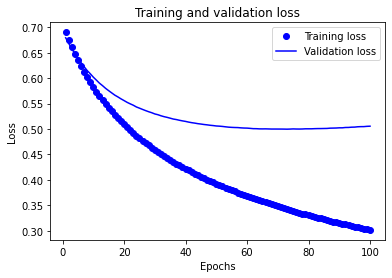

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

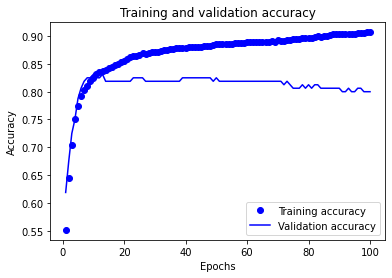

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.fit(x_train.A, y_train, epochs=3, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/3
45/45 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.9083 - val_loss: 0.5060 - val_accuracy: 0.8000
Epoch 2/3
45/45 [==============================] - 0s 4ms/step - loss: 0.2990 - accuracy: 0.9083 - val_loss: 0.5064 - val_accuracy: 0.8000
